In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
%cd yolov5

c:\practice\PCB_defect_detection\yolov5


In [3]:
!pip install -U -r requirements.txt

  Using cached numpy-2.1.0-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached ultralytics-8.2.86-py3-none-any.whl.metadata (41 kB)
INFO: pip is looking at multiple versions of ultralytics to determine which version is compatible with other requirements. This could take a while.


In [4]:
data_yaml_content = """

train: ../PCB_DATASET/PCB_split/train
val: ../PCB_DATASET/PCB_split/val
nc: 6
names: ['spurious_copper', 'mouse_bite', 'open_circuit', 'missing_hole', 'spur', 'short']
"""

In [5]:
%pwd

'c:\\practice\\PCB_defect_detection\\yolov5'

In [6]:
with open('./data/data.yaml', 'w') as f:
    f.write(data_yaml_content)

In [ ]:
!python ./train.py --img-size 640 --batch-size 16 --epochs 100 --data ./data/data.yaml --cfg ./models/yolov5s.yaml --weights ./yolov5s.pt --name my_experiment --save-period 1 --project ./runs/

In [10]:
%pwd

'c:\\practice\\PCB_defect_detection\\yolov5'

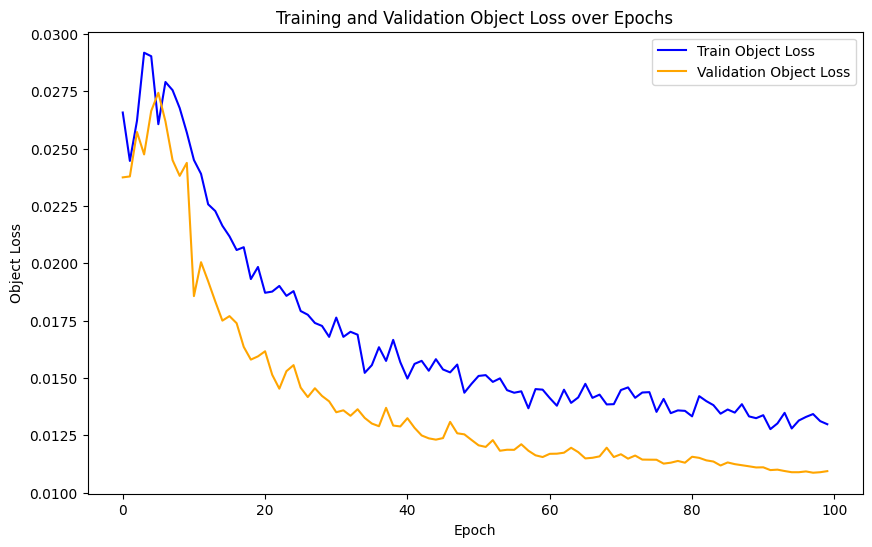

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = './yolov5/runs/my_experiment/results.csv'
df = pd.read_csv(results_path)

df.columns = df.columns.str.strip()

epochs = df['epoch']
train_box_loss = df['train/obj_loss']
val_box_loss = df['val/obj_loss']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Object Loss', color='blue')
plt.plot(epochs, val_box_loss, label='Validation Object Loss', color='orange')

plt.title('Training and Validation Object Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Object Loss')

plt.legend()
plt.show()

In [ ]:
python ./yolov5/detect.py --weights ./yolov5/runs/my_experiment/weights/best.pt --img-size 640 --conf 0.5 --source ./rotation_test_resized --save-txt --save-conf --project ./yolov5/runs/detect/